# Premier neurone
fait en suivant la série de vidéo sur le deep learning de machine learnia

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


dimensions de X: (100, 2)
dimensions de y: (100, 1)


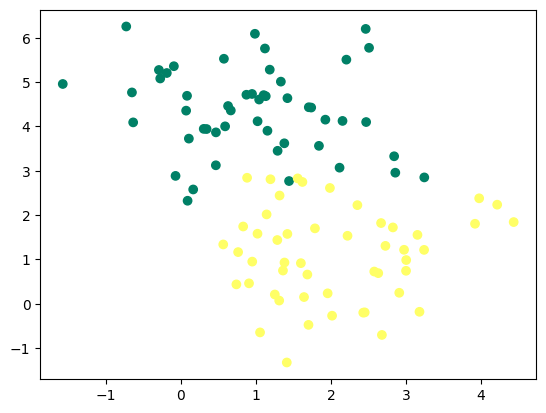

In [3]:
# création d'un jeu de données - exemple pour les plantes toxiques
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [4]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [5]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [6]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [7]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [8]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [9]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [10]:
from sklearn.metrics import accuracy_score

In [85]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    nb_iter = 10
    j = 0
    histo = np.zeros((n_iter // nb_iter, 5))
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
        #visualisation de la déscente de gradient
        if i % nb_iter == 0:
            histo[j, 0] = W[0]
            histo[j, 1] = W[1]
            histo[j, 2] = b
            histo[j, 3] = i
            histo[j, 4] = log_loss(A, y)
            j += 1

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

0.92


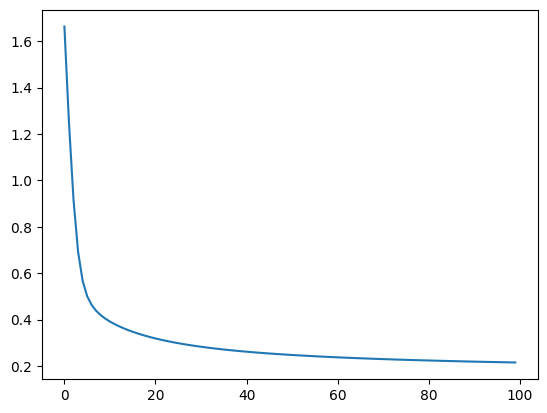

In [12]:
W, b = artificial_neuron(X, y)

# **Cat vs dog**
Le but de l'exervice est d'entrainer le modèle à l'aide d'un datasets donné afin qu'il puisse reconnaitre un chien ou un chat à partir d'une photo

In [93]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1) # Réduire l'échelle des poids
    b = 1 # Initialiser le biais à zéro
    return (W, b)

In [14]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [42]:
def log_loss(A, y):
    y = np.array(y)
    assert set(np.unique(y)) <= {0, 1}, "Les valeurs de y doivent être 0 ou 1."
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [16]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [17]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [18]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [104]:
from sklearn.metrics import accuracy_score
# %pip install tqdm
from tqdm import tqdm

In [105]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)
    W[1], W[2] = -7.5, -7.5
    

    Loss = []
    acc = []

    for i in tqdm(range(n_iter)):
        
        A = model(X, W, b)
        
        if i % 10 == 0:
            #calcul du cout
            Loss.append(log_loss(A, y))
            #calcul de l'accuracy
            y_pred = predict(X, W, b)
            acc.append(accuracy_score(y, y_pred))
        
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        

    
        # Affichage des courbes
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(Loss)
    plt.subplot(1, 2, 2)
    plt.plot(acc)
    
    plt.show()

    return (W, b)

In [21]:
%pip install h5py
import numpy as np
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from utilities import *
X_train, y_train, X_test, y_test = load_data()


In [23]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1000, 64, 64)
X_test shape: (200, 64, 64)
y_train shape: (1000, 1)
y_test shape: (200, 1)


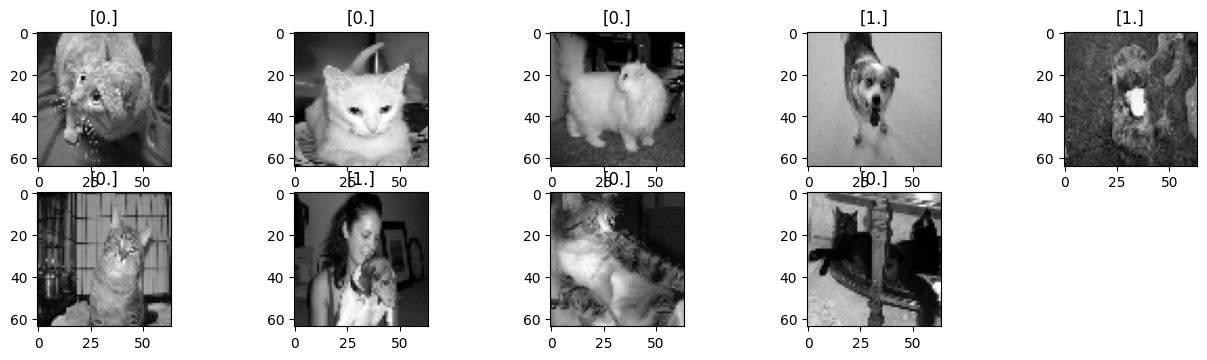

In [24]:
# utilisation matplotlib pour afficher les 10 premieres images du datasets
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout


In [25]:
#Normalisation des datas 
#on normalise que les images
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Vérification des valeurs
print(f"X_train_normalized: min = {X_train_normalized.min()}, max = {X_train_normalized.max()}")
print(f"X_test_normalized: min = {X_test_normalized.min()}, max = {X_test_normalized.max()}")

X_train_normalized: min = 0.0, max = 0.996078431372549
X_test_normalized: min = 0.0, max = 0.996078431372549


In [26]:
#flattening des datas
X_train_flatten = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flatten = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Vérification des nouvelles dimensions
print(f"X_train_flatten shape: {X_train_flatten.shape}")  # devrait être (1000, 4096)
print(f"X_test_flatten shape: {X_test_flatten.shape}")    # devrait être (200, 4096)

X_train_flatten shape: (1000, 4096)
X_test_flatten shape: (200, 4096)


100%|██████████| 10000/10000 [00:41<00:00, 243.32it/s]


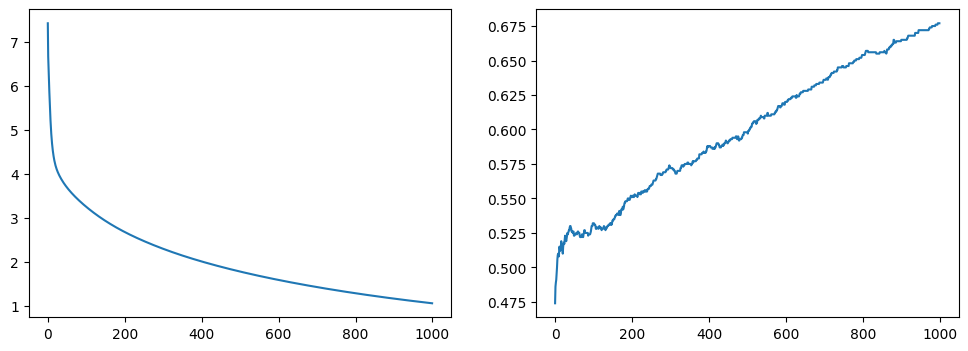

In [107]:
#Entrainer le modèle
W, b = artificial_neuron(X_train_flatten, y_train, learning_rate=0.01, n_iter=10000)

In [98]:
#test du modèle après entrainement
y_pred = predict(X_test_flatten, W, b)
print(accuracy_score(y_test, y_pred))

0.475


In [64]:

#corection
#visualisation des résultats de la normalisation 
lim=10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape 


(2, 10000)

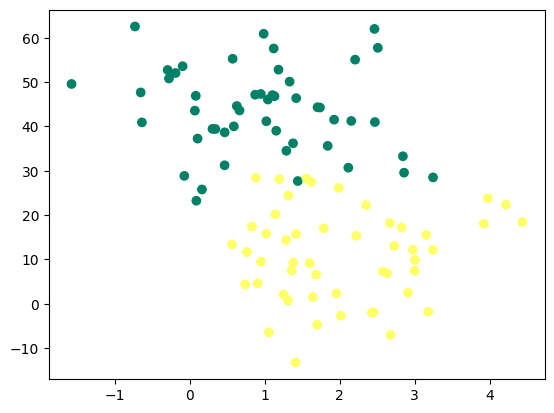

In [78]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

X[:, 1] = X[:, 1] * 10
y = y.reshape((y.shape[0], 1))


plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [82]:

b=0
A = model(X, W_final, b)
A.shape
epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape



(100, 100)

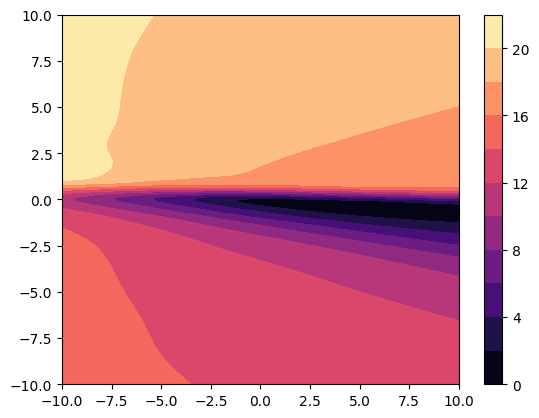

In [83]:
plt.contourf(W11, W22, L, 10,cmap="magma")
plt.colorbar()